# Physics 453 - Probability and Python Practice

$\bf{Probabilities}$ play a big role in the toolbox of a quantum mechanic.  In this class, we'll spend a lot of time learning that we usually cannot predict the exact values of a quantum particle's energy, momentum, position, etc. like we can in classical physics.  Instead, we'll obtain probability distributions (discrete or continuous) for these $\bf{observables}$, so it's important to understand some basics about probability theory.  In this notebook, we'll review how to calculate and understand the $\bf{mean}$, $\bf{variance}$, and $\bf{standard\ deviation}$ of a set of data, as well as work with $\bf{probability\ distributions}$.

This class will also involve computational assignments to help calculate and visualize quantum problems that just aren't feasible to solve with pencil and paper.  This Jupyter notebook is designed to touch on many of the programming concepts you'll need to understand in Python - variables, arrays, loops, plotting, and functions.

## Probability Distributions

A probability distribution, or probability density, describes how likely it is for some quantity to take a value within some range.  For example, if the location of a ball on the x-axis is described with a probability density $\rho(x)$, the probability of the ball being found between $a$ and $b$, written as $P_{ab}$, is given by:
$$P_{ab}=\int_a^b \rho(x)dx$$
Probability densities must be normalized, such that the probability of a value being between $-\infty$ and $\infty$ is one.

$$1=\int_{-\infty}^\infty \rho(x)dx$$

With the probability density we can calculate expectation values of various quantities.  An expectation value of $f(x)$, written as $<f(x)>$, is just a weighted average of the values of $f(x)$ against the probability density $\rho(x)$.  It is calculated as
$$<f(x)>=\int_{-\infty}^\infty f(x)\rho(x)dx$$
We can also calculate the variance, $\sigma^2$ of the probability density as:
$$\sigma^2=<x^2>-<x>^2$$

## Numerical Considerations

Between any two points along the number line, like $a$ and $b$, there are an uncountable number of real values.  If we want to deal with continuous probability densities on a computer, we must then approximate this continuum with a discrete set of values, or grid.  For example, instead of trying to write down the whole number line, we instead work with a finite, uniform set of $N$ points:
$$x_i = [x_0, x_1, ..., x_{N-1}]$$
Where $x_i = x_0 + i*\delta x$.  These points are spaced $\delta x$ apart from each other, which means that our continuous integrals become finite sums:
$$P_{ab}=\sum_{i=n}^{m} \rho(x_i)*\delta x$$
Where $x_n$ is the closest point to $a$ and $x_m$ is the closest point to $b$. This approximation to the integral should be good as long as $\delta x$ is small enough.

### Example

Suppose I want to integrate $sin(x)$ from $x=0.0$ to $x=\pi$.  First, I'll import the libraries I'll need - NumPy for math, and MatPlotLib for plotting.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, I setup a grid of values of $x$ between 0 and $\pi$. I'll take $\delta x = 0.01$.

In [19]:
dx = 0.01
a=0.0
b=np.pi
x = np.arange(a,b,dx)

Now, I calculate the value of $sin(x)$ at our grid points and plot them.

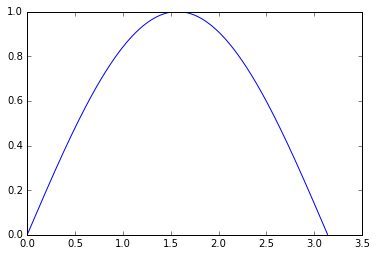

In [23]:
def sin_vals(x):
    return np.sin(x)

sin_values = sin_vals(x)

plt.figure()
plt.plot(x,sin_values)
plt.show()

And finally I'll calculate the integral by summing over the values and multiplying by $\delta x$.

In [21]:
integral_approx = np.sum(sin_values)*dx
print("Approximate value of integral = ", integral_approx)

Approximate value of integral =  1.99999002831


## Gaussian (Normal) Distribution

The Gaussian, or Normal, Distribution is given by
$$\rho(x)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-(x-\mu)^2/2\sigma^2}$$
Where $\mu=<x>$.

### Question 1

Write a function that takes $x$, $\mu$, and $\sigma$ as arguments and returns the values of the Normal distribution.  Make a plot of the Normal distribution between $x=-10$ and $x=10$ for $\mu=1$ and $\sigma=2$.  This is the distribution that we'll work with for the rest of the notebook.

### Question 2

Write a function that calculates and returns $<f(x)>$, taking $\delta x$, $f(x)$, and $\rho(x)$ as inputs.  Use this function to calculate $\mu=<x>$ and $\sigma$. We know what these values should be - does your function calculate the correct values?

### Question 3

Write a function that calculates $P_{ab}$, taking as arguments $a$, $b$, $x$, $\delta x$, and $\rho(x)$.  Use this function to calculate the probability of $x$ being between $\mu-\sigma$ and $\mu+\sigma$. Compare your result to the Wiki page for [normal distributions](https://en.wikipedia.org/wiki/Normal_distribution), under the standard deviation section.

### Question 4
Check that the probability distribution is correctly normalized. Explain your method.